## Womens Clothing E-Commerce Reviews


- Clothing ID: 제품 ID입니다.
- Age: 고객의 연령입니다.
- Title: 리뷰 제목입니다.
- Review Text 텍스트: 리뷰 본문입니다.
- Rating: 고객이 부여한 제품 점수입니다. (최저 1에서 최고 5까지).
- Recommended IND: 추천 여부 (1: 추천, 0: 추천하지 않음)
- Positive Feedback Count: 해당 제품에 대하여 긍정적으로 작성된 리뷰의 개수입니다.
- Division Name: 부서 이름입니다.
- Department Name: 제품의 상위 카테고리입니다.
- Class Name: 제품의 카테고리입니다.

In [52]:
import pandas as pd
df = pd.read_csv('/Users/kimheeyoung/Downloads/Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [53]:
# Title과 Review Text에서 결측치 차이를 확인했습니다.
# 제목결측치가 리뷰 결측치보다 많은 것을 보아 제목없이 작성된 리뷰가 많다고 판단했습니다.
# 리뷰의 결측치는 삭제하기로 하고 제목 결측치는 보간하기로 하였습니다.
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [54]:
# 작은 값의 결측치 삭제
df = df.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'])
Review_Text_percentile = 845/23486
print(df.shape)
print(f"Review_Text는 전체 데이터 중 {Review_Text_percentile*100:.2}%를 차지하므로 데이터의 유의미 수준이 작다고 판단하여 삭제하기로 합니다.")

(22628, 11)
Review_Text는 전체 데이터 중 3.6%를 차지하므로 데이터의 유의미 수준이 작다고 판단하여 삭제하기로 합니다.


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended IND          22628 non-null  int64 
 7   Positive Feedback Count  22628 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [56]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [57]:
# Title은 없지만 Review는 있는 값을 위해 빈 Title을 "Title" 이라는 값으로 보간해줍니다.
# 분석에 영향을 주지 않기 위해 Title이라고 정했음
df = df.fillna("Title")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    22628 non-null  object
 4   Review Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended IND          22628 non-null  int64 
 7   Positive Feedback Count  22628 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [58]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [60]:
df["length"] = df["Review Text"].str.len()
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,767,33,Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,1080,34,Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,131
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,223
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,208
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,427


In [61]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,length
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784,308.761534
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520,143.934126
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,9.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000,186.000000
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000,302.000000
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000,459.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,508.000000


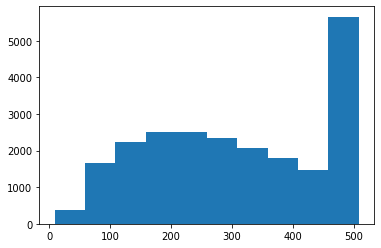

In [63]:
import matplotlib.pyplot as plt

plt.hist(df["length"]);